X, Y =  [array([[ 84.,  46.],
       [ 73.,  20.],
       [ 65.,  52.],
       [ 70.,  30.],
       [ 76.,  57.],
       [ 69.,  25.],
       [ 63.,  28.],
       [ 72.,  36.],
       [ 79.,  57.],
       [ 75.,  44.],
       [ 27.,  24.],
       [ 89.,  31.],
       [ 65.,  52.],
       [ 57.,  23.],
       [ 59.,  60.],
       [ 69.,  48.],
       [ 60.,  34.],
       [ 79.,  51.],
       [ 75.,  50.],
       [ 82.,  34.],
       [ 59.,  46.],
       [ 67.,  23.],
       [ 85.,  37.],
       [ 55.,  40.],
       [ 63.,  30.]], dtype=float32), array([ 354.,  190.,  405.,  263.,  451.,  302.,  288.,  385.,  402.,
        365.,  209.,  290.,  346.,  254.,  395.,  434.,  220.,  374.,
        308.,  220.,  311.,  181.,  274.,  303.,  244.], dtype=float32)]
loss:  [array([[ 84.,  46.],
       [ 73.,  20.],
       [ 65.,  52.],
       [ 70.,  30.],
       [ 76.,  57.],
       [ 69.,  25.],
       [ 63.,  28.],
       [ 72.,  36.],
       [ 79.,  57.],
       [ 75.,  44.],
       [ 27.,  24.

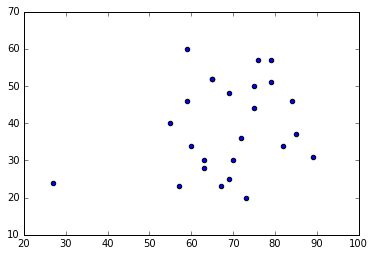

In [1]:
# Author: 杨玉奇
# email: yangyuqi@sina.com
# url: https://github.com/jerryyyq/tf_algorithm_example
# copyright yangyuqi
# 著作权归作者 杨玉奇 所有。商业转载请联系作者获得授权，非商业转载请注明出处。
# date: 2017-09-09

%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
W = tf.Variable(tf.zeros([2, 1]), name = "weights")
b = tf.Variable(0., name = "bias")

def inference(X):
    return tf.matmul(X, W) + b

def loss(sess, X, Y):
    Y_predicted = inference(X)
    print( 'loss: ', sess.run([X, Y, Y_predicted]) )
    return tf.reduce_sum(tf.squared_difference(Y, Y_predicted)) # same tf.reduce_sum( tf.pow((Y - Y_predicted), 2) )

def inputs():
    weight_age = [[84, 46],[73, 20],[65, 52],[70, 30],[76, 57],[69, 25],[63, 28],
[72, 36],[79, 57],[75, 44],[27, 24],[89, 31],[65, 52],[57, 23],[59, 60],[69, 48],
[60, 34],[79, 51],[75, 50],[82, 34],[59, 46],[67, 23],[85, 37],[55, 40],[63, 30]]
    
    blood_fat_content = [354,190,405,263,451,302,288,385,402,365,209,290,
346,254,395,434,220,374,308,220,311,181,274,303,244]
    
    # draw these point
    # plt.plot(weight_age)
    weight_point = list( zip(*weight_age) )
    plt.scatter(weight_point[0], weight_point[1])
    # for i in range(len(weight_age)):
    #     plt.scatter(weight_age[i][0], weight_age[i][1], s = blood_fat_content[i])   
        
    return tf.to_float(weight_age), tf.to_float(blood_fat_content)

def train(total_loss):
    # total_loss also is cost
    learning_rate = 0.0000001
    return tf.train.GradientDescentOptimizer(learning_rate).minimize(total_loss)

def evaluate(sess, X, Y):
    print( sess.run(inference([[80., 25.]])) )
    print( sess.run(inference([[65., 25.]])) )
    print( sess.run(inference([[63., 30.]])) )

    
with tf.Session() as sess:
    tf.initialize_all_variables().run()
    X, Y = inputs()

    print( 'X, Y = ', sess.run([X, Y]) )
    
    total_loss = loss(sess, X, Y)
    print('total_loss = ', sess.run(total_loss) )
    train_op = train(total_loss)
    
    
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess = sess, coord = coord)
    
    training_steps = 100      #1000
    for step in range(training_steps):
        sess.run([train_op])
        
        # just every 10 times to print for look change
        if step % 10 == 0:
            print('step = {0}, total_loss = {1}'.format(step, sess.run([total_loss])) )
            print('step = {0}, W = {1}, b = {2}'.format(step, sess.run(W), b.eval()) )
            
    evaluate(sess, X, Y)
    
    coord.request_stop()
    coord.join(threads)
    sess.close()